In [60]:
import numpy as np
import pandas as pd

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('Malware dataset.csv')
data.columns

Index(['hash', 'millisecond', 'classification', 'state', 'usage_counter',
       'prio', 'static_prio', 'normal_prio', 'policy', 'vm_pgoff',
       'vm_truncate_count', 'task_size', 'cached_hole_size', 'free_area_cache',
       'mm_users', 'map_count', 'hiwater_rss', 'total_vm', 'shared_vm',
       'exec_vm', 'reserved_vm', 'nr_ptes', 'end_data', 'last_interval',
       'nvcsw', 'nivcsw', 'min_flt', 'maj_flt', 'fs_excl_counter', 'lock',
       'utime', 'stime', 'gtime', 'cgtime', 'signal_nvcsw'],
      dtype='object')

In [3]:
new_labels = {'malware': 1, 'benign': 0}
data['classification'] = data['classification'].map(new_labels)
data.head()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,1,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,1,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,2,1,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,3,1,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,4,1,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0


In [36]:
data.describe()

,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,vm_truncate_count,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
count,100000.000000,100000.000000,1.000000e+05,100000.0,1.000000e+05,100000.000000,100000.0,100000.0,100000.0,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.00000,100000.0,100000.0
mean,499.500000,0.500000,1.577683e+05,0.0,3.069706e+09,18183.900070,0.0,0.0,0.0,15312.739510,...,32.991160,2.053130,117.920240,1.109190,3.204448e+09,385415.451970,4.059310,1.66142,0.0,0.0
std,288.676434,0.500003,9.361726e+05,0.0,2.963061e+05,4609.792765,0.0,0.0,0.0,3256.475008,...,52.730176,13.881382,3.116892,2.160466,0.000000e+00,10144.036494,0.822848,3.26304,0.0,0.0
min,0.000000,0.000000,0.000000e+00,0.0,3.069190e+09,13988.000000,0.0,0.0,0.0,9695.000000,...,0.000000,0.000000,112.000000,0.000000,3.204448e+09,371782.000000,3.000000,0.00000,0.0,0.0
25%,249.750000,0.000000,0.000000e+00,0.0,3.069446e+09,14352.000000,0.0,0.0,0.0,12648.000000,...,1.000000,0.000000,114.000000,0.000000,3.204448e+09,378208.000000,3.000000,0.00000,0.0,0.0
50%,499.500000,0.500000,0.000000e+00,0.0,3.069698e+09,16159.000000,0.0,0.0,0.0,15245.000000,...,9.000000,1.000000,120.000000,0.000000,3.204448e+09,383637.000000,4.000000,0.00000,0.0,0.0
75%,749.250000,1.000000,4.096000e+03,0.0,3.069957e+09,22182.000000,0.0,0.0,0.0,17663.000000,...,46.000000,1.000000,120.000000,1.000000,3.204448e+09,390324.000000,5.000000,1.00000,0.0,0.0
max,999.000000,1.000000,4.326605e+07,0.0,3.070222e+09,31855.000000,0.0,0.0,0.0,27157.000000,...,365.000000,256.000000,120.000000,18.000000,3.204448e+09,421913.000000,7.000000,15.00000,0.0,0.0


In [91]:
class_data = data.drop(columns=['hash', 'classification'])
x_train, x_test, y_train, y_test = train_test_split(class_data, data['classification'], test_size=0.2, random_state=77)

In [84]:
# Naive Bayes
nb = GaussianNB()
nb.fit(x_train, y_train)

y_pred = nb.predict(x_test)

nb_accuracy = accuracy_score(y_test, y_pred)
nb_precision = precision_score(y_test, y_pred)
nb_recall = recall_score(y_test, y_pred)
nb_f1 = f1_score(y_test, y_pred)

print(f"""Naive Bayes scores
      accuracy score: {nb_accuracy}
      precision score: {nb_precision}
      recall score: {nb_recall}
      f1 score: {nb_recall}\n""")
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_pred)}")


Naive Bayes scores
      accuracy score: 0.6198
      precision score: 0.5828977629103074
      recall score: 0.8378243013122308
      f1 score: 0.8378243013122308

Confusion matrix:
[[4032 5985]
 [1619 8364]]


In [85]:
tree = DecisionTreeClassifier(max_depth=100)
tree.fit(x_train, y_train)

y_pred = tree.predict(x_test)

dt_accuracy = accuracy_score(y_test, y_pred)
dt_precision = precision_score(y_test, y_pred)
dt_recall = recall_score(y_test, y_pred)
dt_f1 = f1_score(y_test, y_pred)

print(f"""Decision tree scores
      accuracy score: {dt_accuracy}
      precision score: {dt_precision}
      recall score: {dt_recall}
      f1 score: {dt_f1}\n""")
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_pred)}")

Decision tree scores
      accuracy score: 1.0
      precision score: 1.0
      recall score: 1.0
      f1 score: 1.0

Confusion matrix:
[[10017     0]
 [    0  9983]]


In [86]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)

print(f"""Random forest scores
      accuracy score: {rf_accuracy}
      precision score: {rf_precision}
      recall score: {rf_recall}
      f1 score: {rf_f1}\n""")
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_pred)}")

Random forest scores
      accuracy score: 1.0
      precision score: 1.0
      recall score: 1.0
      f1 score: 1.0

Confusion matrix:
[[10017     0]
 [    0  9983]]


In [87]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

y_pred = rf.predict(x_test)

knn_accuracy = accuracy_score(y_test, y_pred)
knn_precision = precision_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
knn_f1 = f1_score(y_test, y_pred)

print(f"""KNN scores
      accuracy score: {knn_accuracy}
      precision score: {knn_precision}
      recall score: {knn_recall}
      f1 score: {knn_recall}\n""")
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_pred)}")

KNN scores
      accuracy score: 1.0
      precision score: 1.0
      recall score: 1.0
      f1 score: 1.0

Confusion matrix:
[[10017     0]
 [    0  9983]]


In [92]:
# SVM
svc = SVC(kernel='linear')
svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)

svm_accuracy = accuracy_score(y_test, y_pred)
svm_precision = precision_score(y_test, y_pred)
svm_recall = recall_score(y_test, y_pred)
svm_f1 = f1_score(y_test, y_pred)

print(f"""SVM scores
      accuracy score: {svm_accuracy}
      precision score: {svm_precision}
      recall score: {svm_recall}
      f1 score: {svm_recall}\n""")
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_pred)}")

# Train with one of each class

SVM scores
      accuracy score: 0.50085
      precision score: 0.0
      recall score: 0.0
      f1 score: 0.0

Confusion matrix:
[[10017     0]
 [ 9983     0]]


/home/paul/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


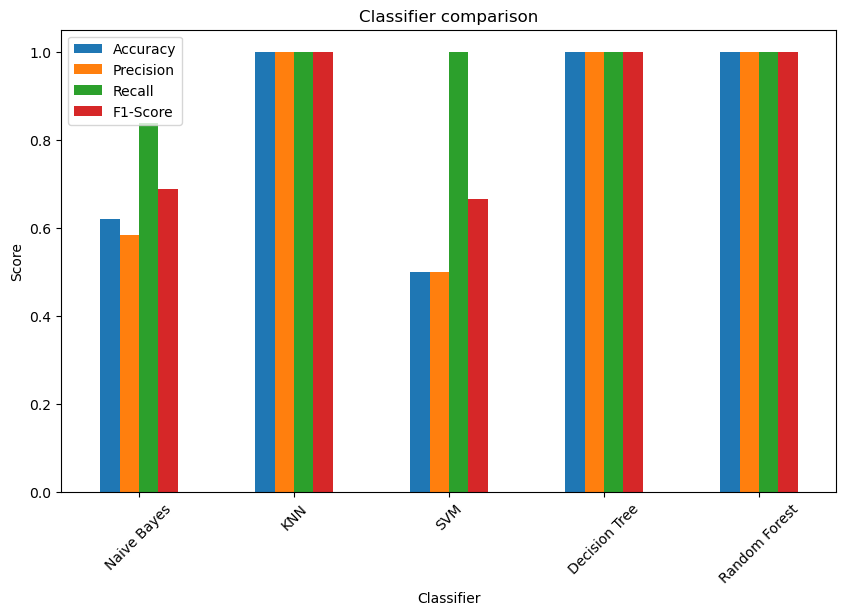

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

results = {
    "Classifier": ["Naive Bayes", "KNN", "SVM", "Decision Tree", "Random Forest"],
    "Accuracy": [nb_accuracy, knn_accuracy, svm_accuracy, dt_accuracy, rf_accuracy],
    "Precision": [nb_precision, knn_precision, svm_precision, dt_precision, rf_precision],
    "Recall": [nb_recall, knn_recall, svm_recall, dt_recall, rf_recall],
    "F1-Score": [nb_f1, knn_f1, svm_f1, dt_f1, rf_f1]
}
df_results = pd.DataFrame(results)

##Code to display the results
df_results.plot(kind='bar', x='Classifier', figsize=(10, 6))
plt.title('Classifier comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Features importance')

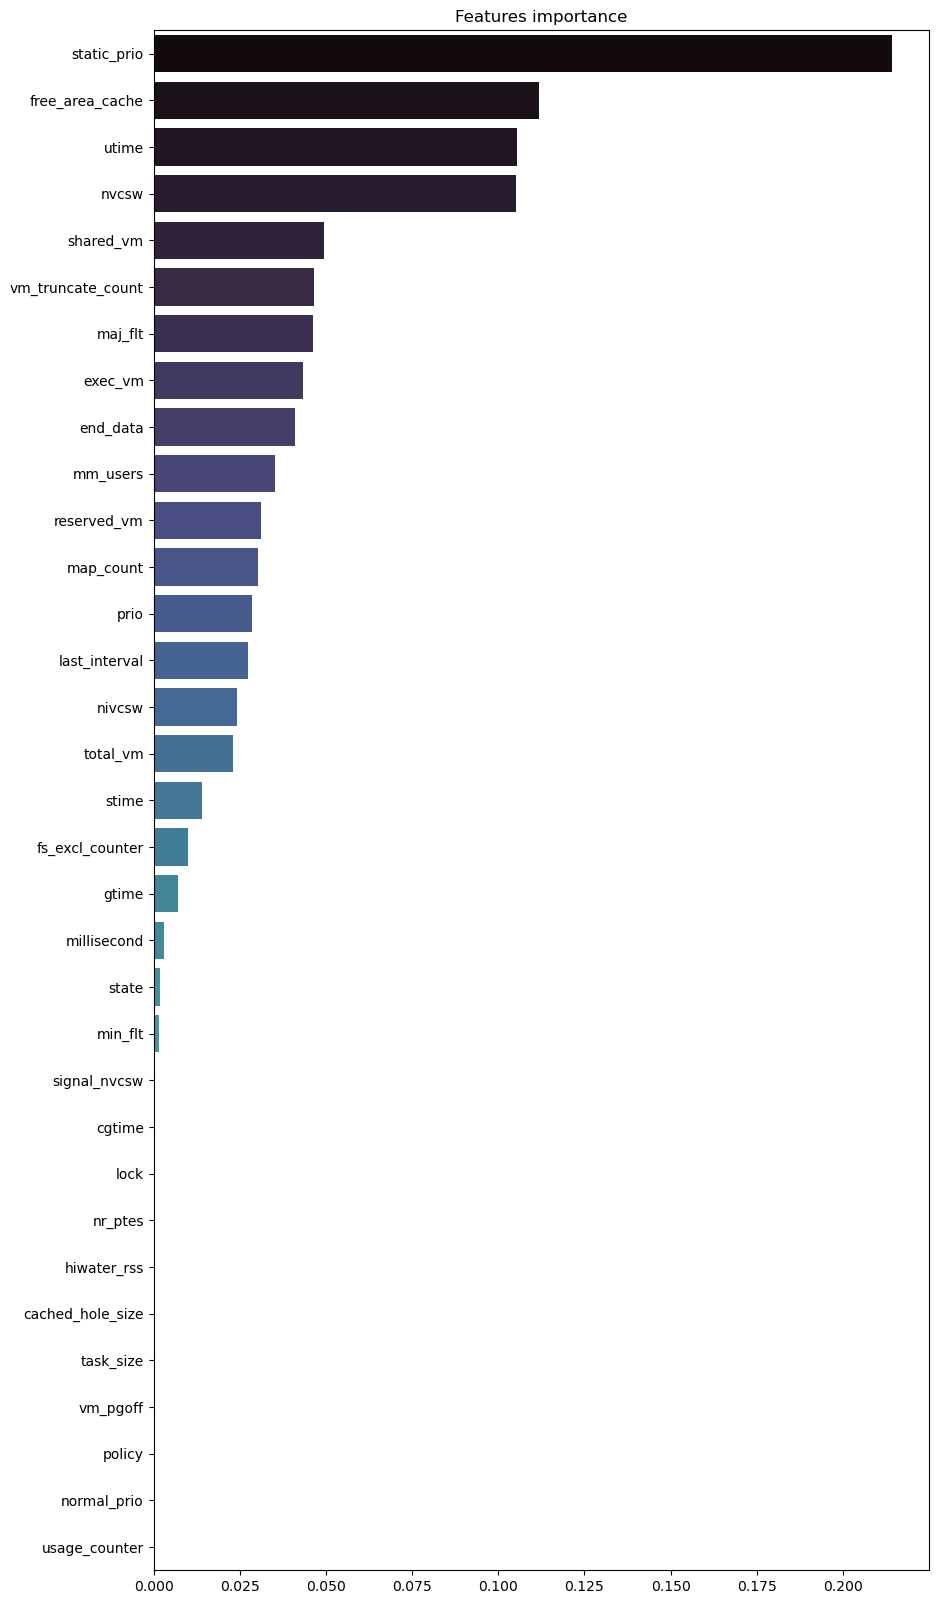

In [90]:
# Feature importance
importance = rf.feature_importances_
importance_dict = {class_data.columns.values[i]: importance[i] for i in range (len(importance))}
sorted_dict = {k: v for k, v in sorted(importance_dict.items(), key=lambda item: item[1])}
plt.figure(figsize=(10, 20))
sns.barplot(y=list(sorted_dict.keys())[::-1], x=list(sorted_dict.values())[::-1], palette='mako')
plt.title('Features importance')

